In [1]:
__author__ = "@Tssp"
__date__ = "30/09/20"
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# Constants:
###########
hbar = 1
w = 1
m = 1

In [3]:
# xaxis:
########
xmin = -15 # a.u
xmax = 15 # a.u
delta = 0.05
x = np.arange(xmin, xmax, delta)
N = len(x)

In [4]:
# Potential:
############
def potho(x):
    return 1/2 * m * w**2 * x**2

In [5]:
# Kinetic Energy:
#################
def Kin(N):
    T = np.zeros((N, N))
    for i in range(N):
        i += 1 
        for j in range(N):
            j += 1
            if i == j:
                T[i-1, i-1] = -hbar**2/(2*m) * (-1/3*(pi/delta)**2 + 2/delta**2 * (-1)**(i+j)/(i+j)**2)
            elif i != j:
                T[i-1, j-1] = hbar**2/(delta**2*m) * ((-1)**(i-j)/(i-j)**2 - (-1)**(i+j)/(i+j)**2)
    return T
       
T = Kin(N)        
# Potential:
############
V = potho(x)

In [6]:
# Hamiltonian:
##############
H = T + np.diagflat(V)

In [7]:
# Diagonalization:
##################
E, cn = np.linalg.eig(H)

In [8]:
inds = E.argsort()
E = E[inds[::1]]
cn = cn[:,inds[::1]]
print("n        E")
for i in range(11):
    print(i, E[i])
print("\nBingo !")

n        E
0 0.5000000000001705
1 1.5000000000008962
2 2.499999999999963
3 3.5000000000000533
4 4.500000000000996
5 5.500000000000081
6 6.500000000000523
7 7.500000000000416
8 8.500000000000654
9 9.499999999999913
10 10.500000000000092

Bingo !


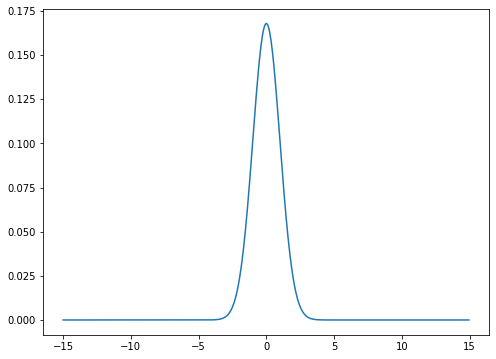

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, -cn[:,0])
#ax.plot(x, V, 'k', lw=2)